In [1]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

### Batch Gradient Descent

In [2]:
m = 100
X = 2*np.random.rand(m, 1)  # column vector
y = 4 + 3*X + np.random.randn(m, 1)  # y = b + WX + noise

X_b = add_dummy_feature(X)
X_b.shape

(100, 2)

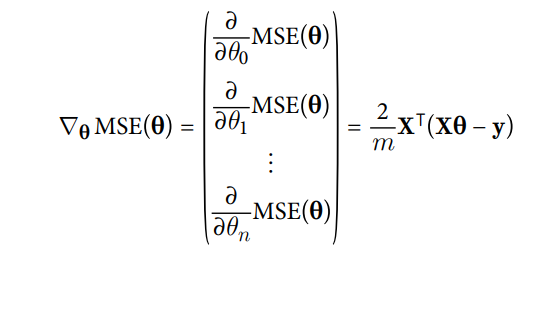

In [3]:
learning_rate = .1  # 0.1
theta = np.random.randn(X_b.shape[1], 1)
epochs = 1000

theta_path_bgd = []
for ep in range(epochs):
    gradients = (2/m)*X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate*gradients
    theta_path_bgd.append(theta)

In [4]:
theta

array([[3.88066469],
       [3.07819466]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

In [6]:
import warnings
import matplotlib
warnings.filterwarnings('ignore')

plt.rc('font', size=8)
plt.rc('axes', labelsize=10, titlesize=12)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

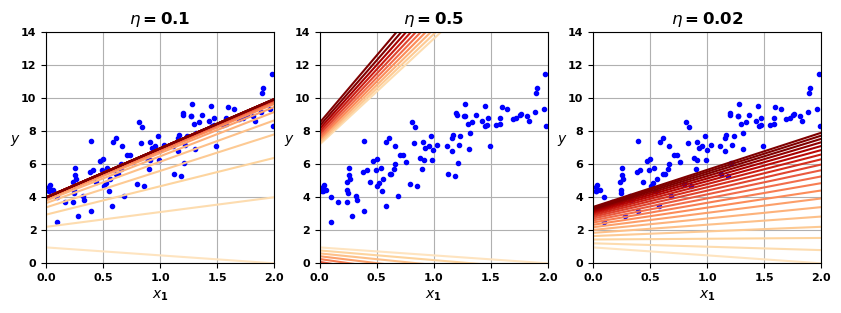

In [7]:
def plot_training_lines(learning_rate, theta):
    plt.plot(X, y, 'b.')
    epochs = 1000
    n_shown = 20
    for epoch in range(epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(
                plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients

    plt.title(fr'$\eta = {learning_rate}$')
    plt.xlabel('$x_1$')
    plt.ylabel('$y$', rotation=0)
    plt.axis([0, 2, 0, 14])
    plt.grid()


theta = np.random.randn(X_b.shape[1], 1)
plt.figure(figsize=(10, 3))

plt.subplot(131)
plot_training_lines(learning_rate=0.1, theta=theta)

plt.subplot(132)
plot_training_lines(learning_rate=0.5, theta=theta)

plt.subplot(133)
plot_training_lines(learning_rate=0.02, theta=theta)

plt.show()

### Stochatic Gradient Descent 

[[3.92396135]
 [3.08264184]]


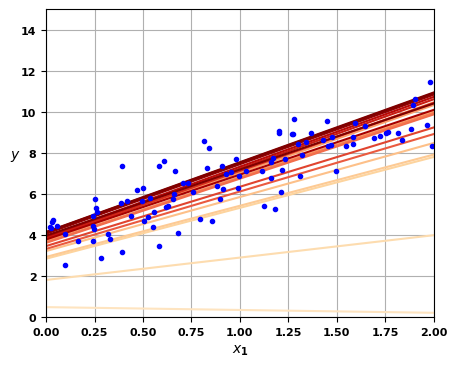

In [15]:
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t+t1)


np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(5, 4))

theta_path_sgd = []
epochs = 50
for ep in range(epochs):
    for i in range(m):

        if ep == 0 and i < 20:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(plt.cm.OrRd(i / 20 + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2*xi.T @ (xi @ theta - yi)
        learning_rate = learning_schedule(ep*m + i)
        theta = theta - gradient*learning_rate
        theta_path_sgd.append(theta)
print(theta)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

#### with sklearn

In [9]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,
                     eta0=0.01, n_iter_no_change=100, random_state=42)
model.fit(X, y.ravel())
prediction = model.predict(X_new)
print(model.intercept_, model.coef_)

[3.87781607] [3.07879987]


Try Partial Fit method

In [10]:
model = SGDRegressor(max_iter=100, tol=1e-5, penalty=None,
                     eta0=0.01, n_iter_no_change=100, random_state=42)

In [11]:
for i in range(500):  # 30*50 = 1500 to reach the prev state
    model.partial_fit(X, y.ravel())
    if i % 100 == 0:
        print(f'in iteration #{(i)}', model.intercept_, model.coef_)

in iteration #0 [1.91130203] [2.03883892]
in iteration #100 [3.80374838] [3.15448284]
in iteration #200 [3.862345] [3.10001743]
in iteration #300 [3.87637062] [3.08671984]
in iteration #400 [3.88037118] [3.08274687]


---

### Mini Batch GD

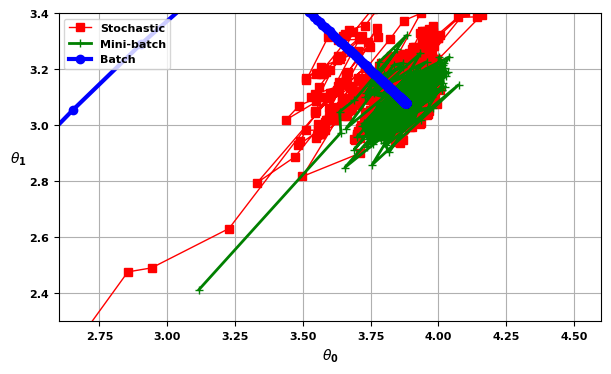

In [17]:

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx: idx + minibatch_size]
        yi = y_shuffled[idx: idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()